In [10]:
from Utils import * 
from param_tools import *
import pickle
import matplotlib
import numpy as np

In [11]:
## Select Padrameters

n_pts = 60
noise = 0.05 #add gaussain noise
energyType = 1 # 0:harmonic, 1:spring
S = 0 # rest length of spring
K = 1e2 # spring constant
n_steps = 6000 # number of optimization steps
alpha = 1e-5 # need to be much smaller for spring energy (1e-5 is reasonable for spring energy with K = 1e2)
intermediate_plots = 4 # generate some plots as the script runs for debugging purpose

In [12]:
## Generate data

np.random.seed(10)

#data = generate_noisy_sphere(n_pts, radius=1, noise=noise)
data = generate_density_sphere(n_pts, radius=1, noise=noise, angle=np.pi/4)



TypeError: generate_density_sphere() got an unexpected keyword argument 'angle'

In [ ]:
# Get homological information from Ripser

max_barcode = 1 #off/on/SECOND Largest choice of barcode, overides choose and max_nhood if > 0, -1: smallest code
field = 5 # for computing cocycles
cocycles, distance_matrix, ripser_result = initial_ripser_calculation(data, field, plot=0)
if max_barcode != 0:
    choose = 0
    length = 0
    lengths = []
    n_sizes = []
    for i in range(0, len(cocycles[2][:])):
        birth = ripser_result['dgms'][2][i][0]
        death = ripser_result['dgms'][2][i][1]
        life = death - birth
        lengths.append(life)
        n_sizes.append((1 * death + 3 * birth) / 4)
    if max_barcode == 1:
        idx = np.argmax(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == 2:
        n = 2
        idxes = [lengths.index(i) for i in sorted(lengths, reverse=True)][:n]
        idx = idxes[1]
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == -1:
        idx = np.argmin(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
else:
    birth = ripser_result['dgms'][2][choose][0]
    death = ripser_result['dgms'][2][choose][1]
    max_nhood_size = (death + 3 * birth) / 4

selected_cocycle = cocycles[2][choose]
simplices, values, weight_values = dim_2_get_edges_and_cohomology_info(distance_matrix, selected_cocycle, max_nhood_size)
trg_list = np.fliplr(np.array(simplices))

In [ ]:
values = np.array(values)
print(values[values>=1])


[1 1 4 1]


Sum of Values:7
Choose:1


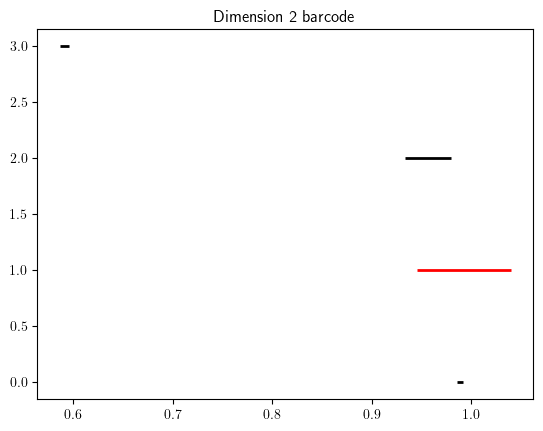

In [ ]:
# Make barcode
sum_val = np.sum(values)
print('Sum of Values:'+str(sum_val))
plt.figure()
for i in range(0, len(cocycles[2][:])):
    birth = ripser_result['dgms'][2][i][0]
    death = ripser_result['dgms'][2][i][1]
    if i == choose:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
        print('Choose:'+str(i))
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.title('Dimension 2 barcode')
plt.show()

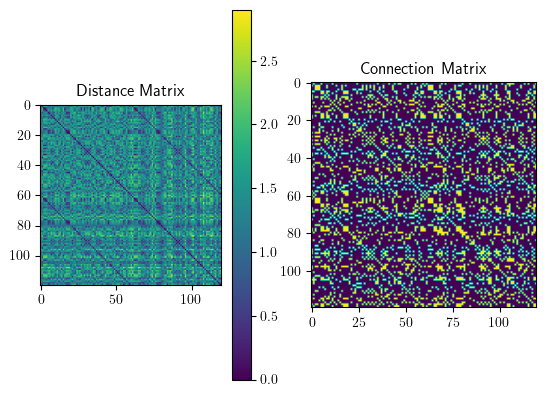

Values are:[0 1 4]  N Trgs:10045  Nonzero:4


In [ ]:
## Plot initial data
initial_plot = 1
if initial_plot == 1:
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(distance_matrix)
    plt.colorbar()
    plt.title('Distance Matrix')
    plt.subplot(1,2,2)
    connection_matrix = distance_matrix.copy()
    connection_matrix[distance_matrix < max_nhood_size] = 1
    connection_matrix[distance_matrix > max_nhood_size] = 0
    plt.imshow(connection_matrix)
    plt.title('Connection Matrix')
    plt.show()
    print('Values are:' + str(np.unique(values)) + '  N Trgs:' + str(len(trg_list)) + '  Nonzero:' + str(np.count_nonzero(values)))


Setting up points and barycenters


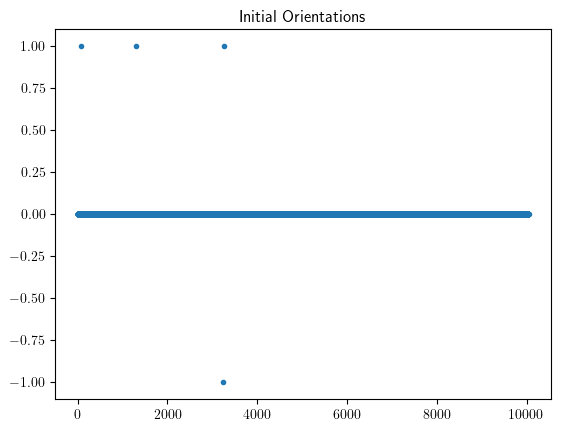

In [ ]:
## Barycenters and points
print('Setting up points and barycenters')
bary = np.zeros(trg_list.shape)
orient = np.zeros(len(trg_list))
for i in range(len(trg_list)):
    if values[i] == 0:
        bary[i, :] = [1, 0, 0]
    else:
        bary[i, :] = [-1, 0, 0]
        if values[i] == 1:
            orient[i] = 1
        else:
            orient[i] = -1
pts = np.zeros([len(data), 3])
pts[:,0] = 1
plt.figure()
plt.plot(orient, '.')
plt.title('Initial Orientations')
plt.show()

Beginning Minimization
0 314.41248465391686
1 0.4312651108502108
2 0.43126235182376904


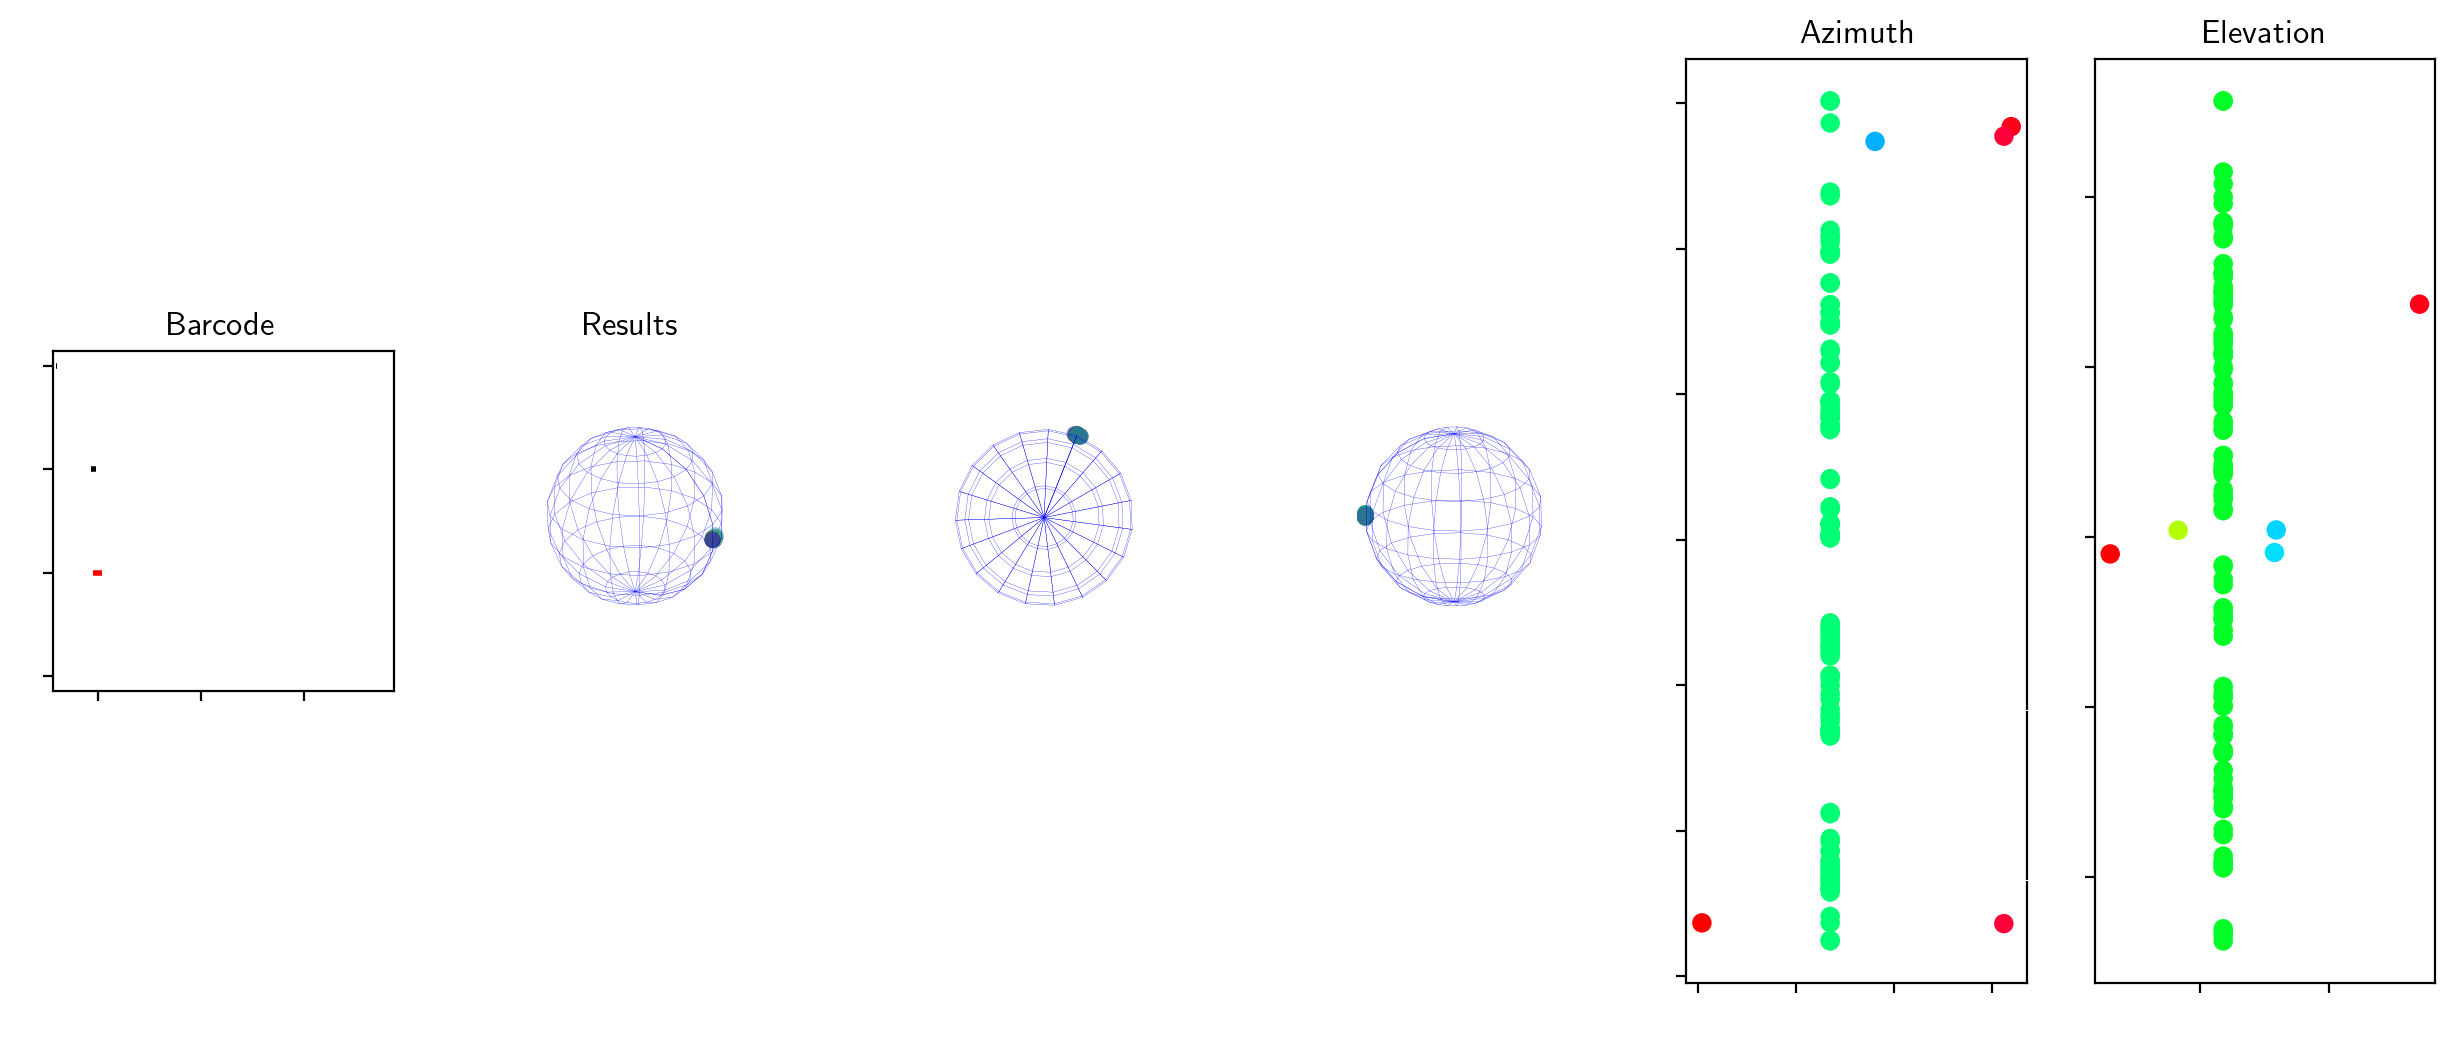

3 0.4312594722302621
4 0.4312564714629769
5 0.43125334909001006
6 0.4312501048783139
7 0.43124673880746306
8 0.4312432510732737
9 0.4312396420809917
10 0.4312359124283886
11 0.43123206288020927
12 0.43122809433643217
13 0.43122400779749376
14 0.4312198043297269
15 0.4312154850336823
16 0.4312110510172322
17 0.43120650337431593
18 0.43120184316939286
19 0.43119707142706176
20 0.4311921891259775
21 0.43118719719610066
22 0.431182096518363
23 0.43117688792596875
24 0.4311715722067083
25 0.43116615010583126
26 0.43116062232944735
27 0.43115498954742615
28 0.4311492523962952
29 0.4311434114821119
30 0.43113746738267683
31 0.4311314206501431
32 0.43112527181310106
33 0.4311190213784454
34 0.43111266983304114
35 0.43110621764520474
36 0.4310996652660319
37 0.43109301313057696
38 0.4310862616589116
39 0.43107941125707794
40 0.43107246231794244
41 0.4310654152219707
42 0.431058270337931
43 0.43105102802353346
44 0.4310436886260092
45 0.43103625248265215
46 0.4310287199213073
47 0.43102109126082

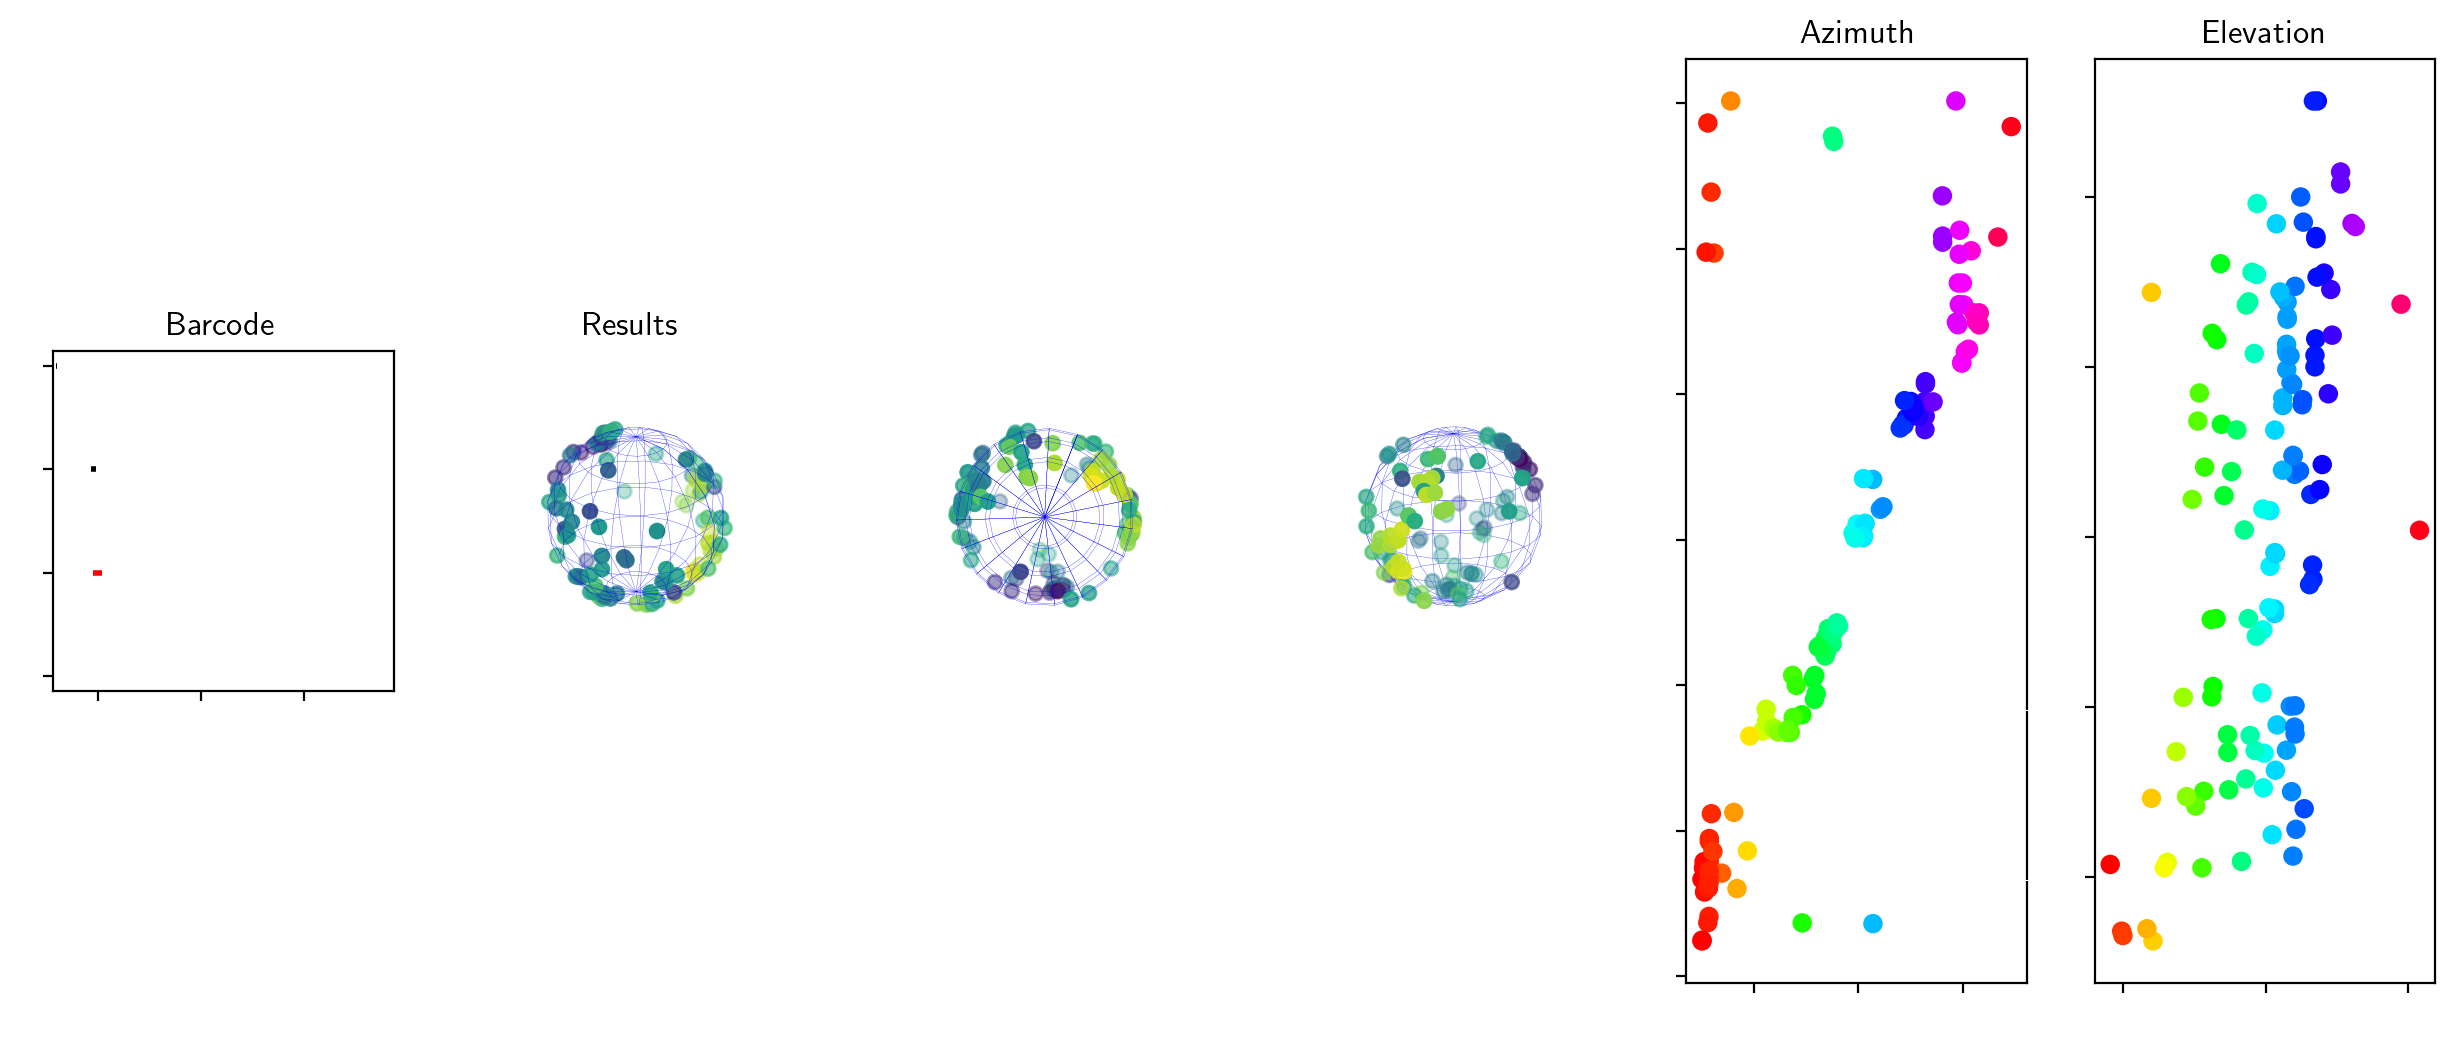

2001 4.497651735724336
2002 4.546403372480312
Increasing at 2002
2003 4.4973557533313215
2004 4.546070266200734
Increasing at 2004
2005 4.497061346815148
2006 4.54573696127954
Increasing at 2006
2007 4.4967684589865025
2008 4.545403522765968
Increasing at 2008
2009 4.496477080467713
2010 4.545069892704028
Increasing at 2010
2011 4.496187056822442
2012 4.544736163579997
Increasing at 2012
2013 4.49589829510596
2014 4.544402363339984
Increasing at 2014
2015 4.495610863022026
2016 4.544068595186084
Increasing at 2016
2017 4.495324602577365
2018 4.5437348373937345
Increasing at 2018
2019 4.495039521237242
2020 4.543401170834865
Increasing at 2020
2021 4.6056884199244585
Increasing at 2021
2022 4.448823283055384
2023 4.503836252442229
Increasing at 2023
2024 4.426752150941501
2025 4.4841054174008725
Increasing at 2025
2026 4.454851465710055
2027 4.564484006411986
Increasing at 2027
2028 4.507443720304783
2029 4.556623701251729
Increasing at 2029
2030 4.510511422181333
2031 4.55163425665039


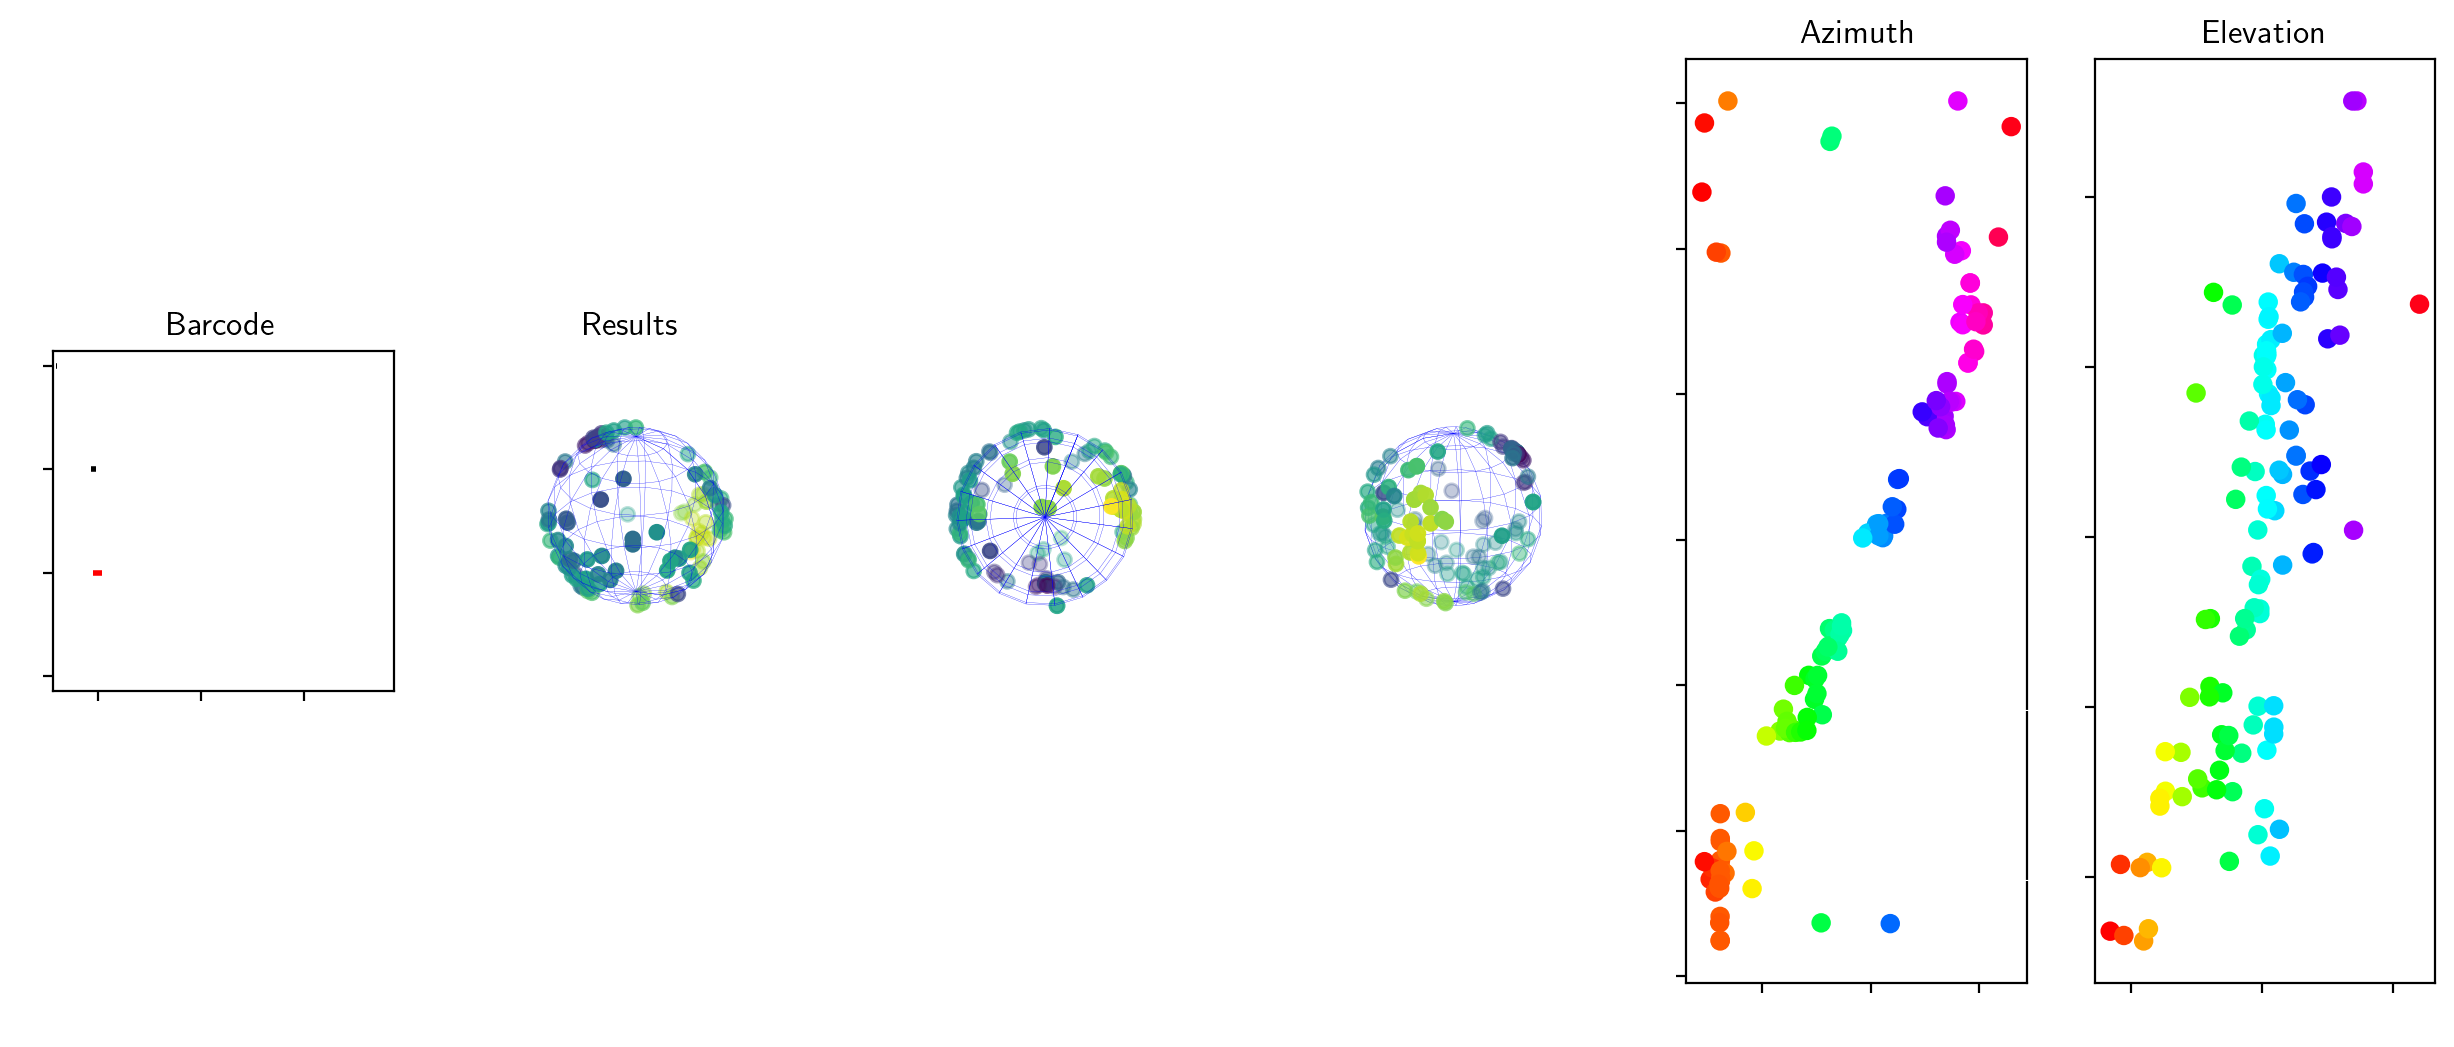

4001 4.3600550224863195
4002 4.416981238256796
Increasing at 4002
4003 4.3600183801010655
4004 4.417237878977528
Increasing at 4004
4005 4.359976101809432
4006 4.4174820941492685
Increasing at 4006
4007 4.359925375570966
4008 4.417728063374667
Increasing at 4008
4009 4.359870582701711
4010 4.417961349436532
Increasing at 4010
4011 4.359807147123188
4012 4.418194661046628
Increasing at 4012
4013 4.359740234342689
4014 4.418416833928856
Increasing at 4014
4015 4.359665439457944
4016 4.418638340226855
Increasing at 4016
4017 4.359587471477447
4018 4.41884708094024
Increasing at 4018
4019 4.359502077685571
4020 4.419057404621951
Increasing at 4020
4021 4.359414355382714
4022 4.419251841510429
Increasing at 4022
4023 4.359318904219041
4024 4.419451933966951
Increasing at 4024
4025 4.359223275557492
4026 4.4196271340272
Increasing at 4026
4027 4.359118266228817
4028 4.419819132407456
Increasing at 4028
4029 4.359016728662689
4030 4.419973629914198
Increasing at 4030
4031 4.358902182809186
40

In [ ]:
# Minimization
NRG = []
print('Beginning Minimization')
for i in range(n_steps):
    # Compute NRG
    E, E_list, A_list, grad = compute_grad_and_NRG(pts, trg_list, bary, orient, energyType, weight_values, S, K)
    NRG.append(E)
    if math.isnan(E):
        print('NAN at i='+str(i))
        break
    # update Grad
    pts, bary = compute_grad_step(pts, trg_list, grad, bary, alpha, i)

    print(i, E)
    # if i % (n_steps // 5) == 0:
    #     if dataType == 0 or dataType == 2 or dataType == 3 or dataType == 4:
    #         plot_data_and_results(data, pts, title=str(i))
    #     plt.show()
    if i > 1:
        if NRG[-2] < NRG[-1]:
            print('Increasing at '+str(i))
            #break
    if i ==2 or i == 2000 or i== 4000 or i == 6000 or i == 10000:
        # Make plots
        fig = plt.figure(figsize=(18, 6), dpi=200)
        simplices = np.array(simplices)
        arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

        ax = fig.add_subplot(1, 7, 2)
        for i in range(0, len(cocycles[2][:])):
            birth = ripser_result['dgms'][2][i][0]
            death = ripser_result['dgms'][2][i][1]
            if i == choose:
                plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
            else:
                plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
        plt.title('Barcode')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.axis('Square')

        u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
        x = np.cos(u) * np.sin(v)
        y = np.sin(u) * np.sin(v)
        z = np.cos(v)
        c = np.sum(data, axis=1).tolist()
        c = c - np.min(c)
        c = c/np.max(c)
        for i in range(3):
            ax = fig.add_subplot(1, 7, 3 + i, projection='3d')
            ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], marker='.', c=c, s=100)
            ax.plot_wireframe(x, y, z, color='b', linewidth=.1)
            ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
            if i == 1:
                ax.view_init(-90, -20)
            if i == 2:
                ax.view_init(-20, 90)
            if i == 0:
                plt.title('Results')
            ax.axis('off')
            ax.grid(visible=None)

        R1, pts1_rotated = align_spheres(pts, data)
        p1, s1 = coord_plot_sphere(pts1_rotated, data, plot=0)
        plt.subplot(1, 7, 6)
        plt.scatter(p1[:, 0], s1[:, 0], c=p1[:, 0], cmap='hsv')
        plt.title('Azimuth')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.subplot(1, 7, 7)
        plt.scatter(p1[:, 1], s1[:, 1], c=p1[:, 1], cmap='hsv')
        plt.title('Elevation')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.show()

# converge
plt.figure()
plt.plot(np.arange(len(NRG)), NRG)
plt.title('Energy')
plt.show()

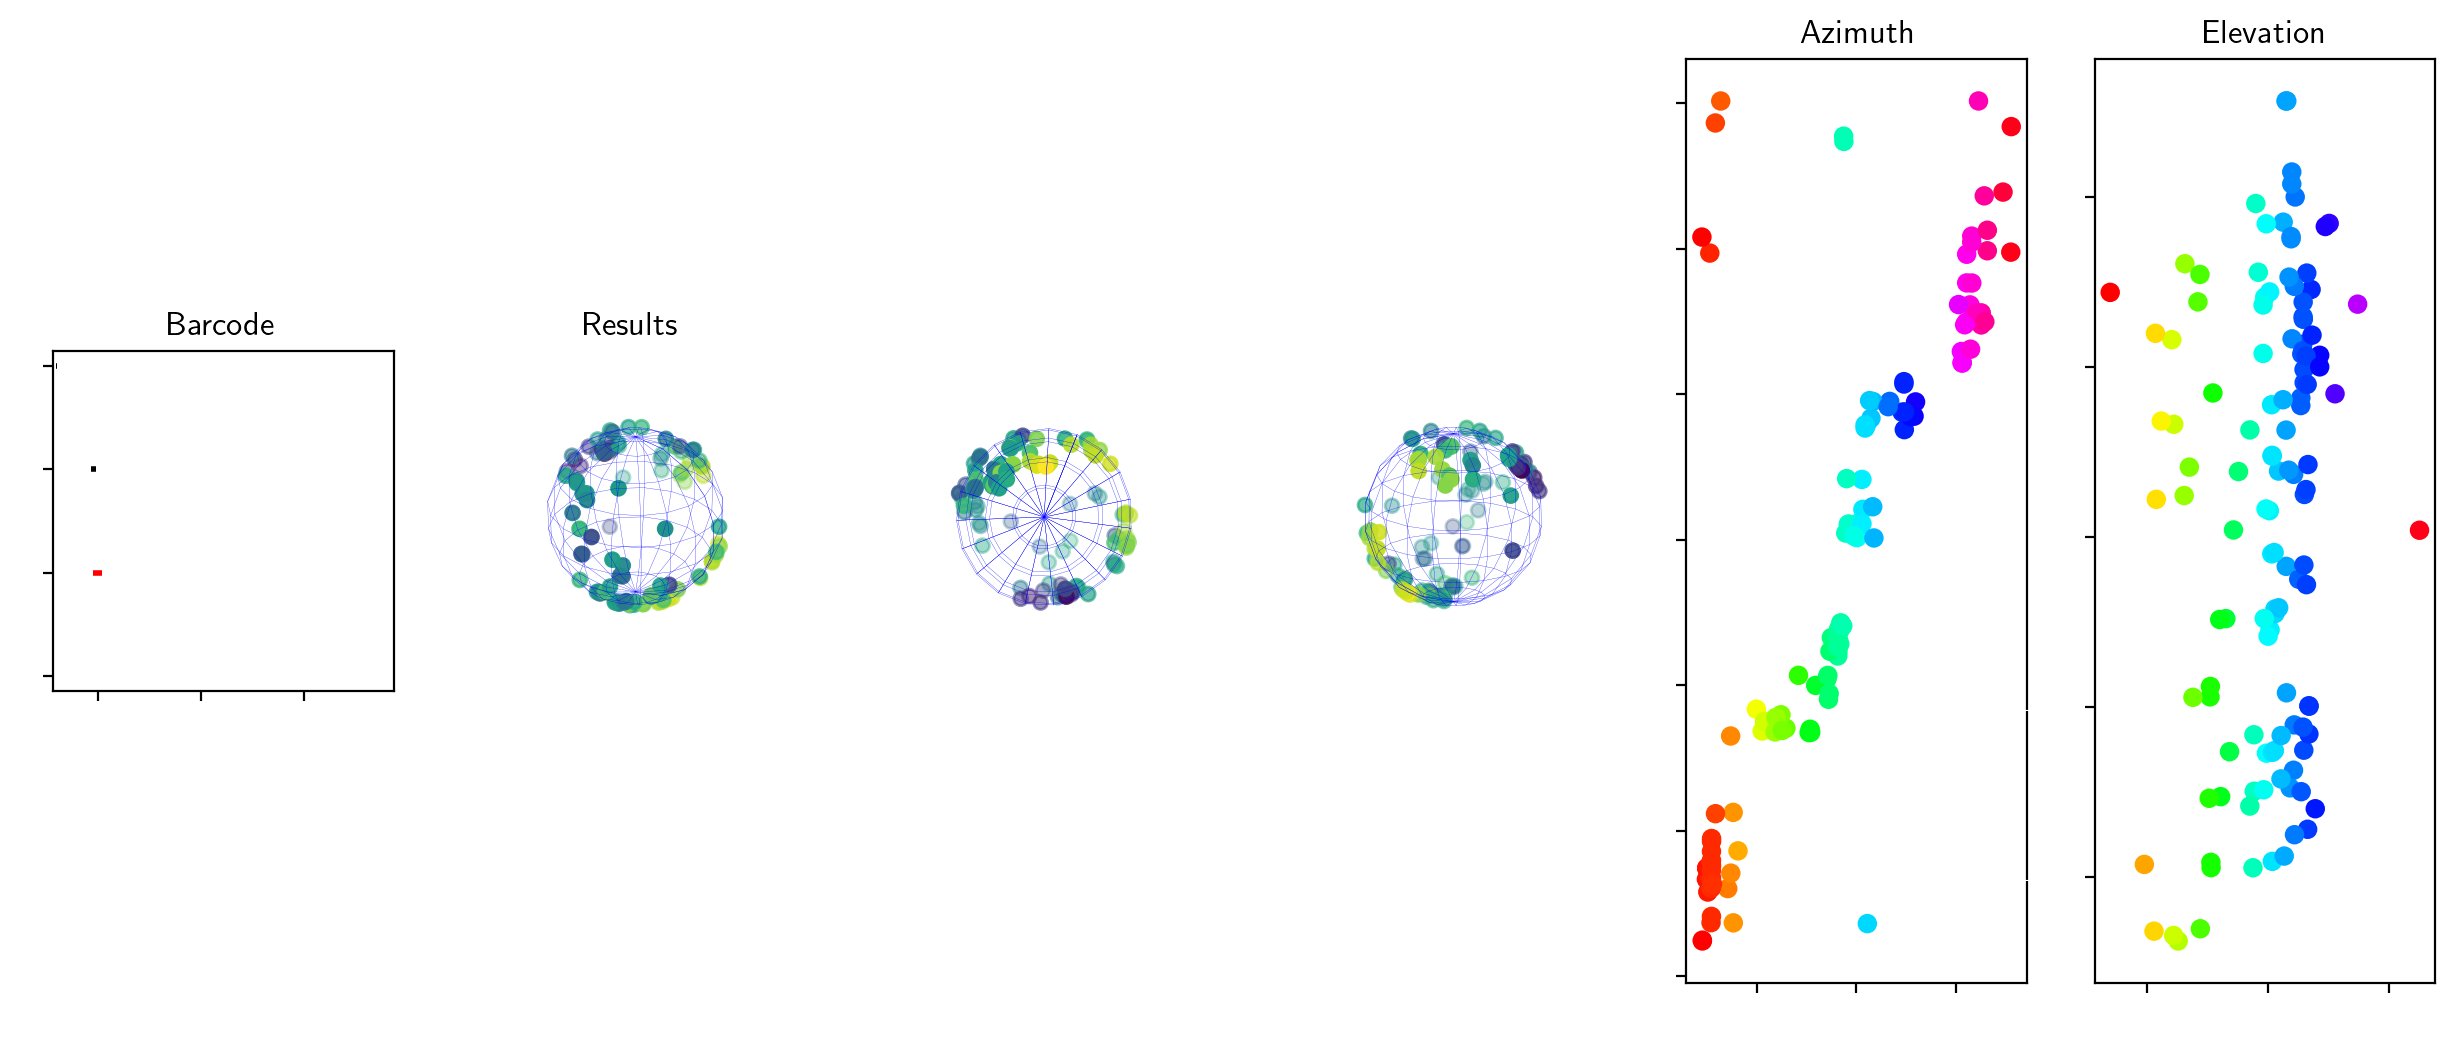

In [ ]:
# Make plots
fig = plt.figure(figsize=(18, 6), dpi=200)
simplices = np.array(simplices)
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

ax = fig.add_subplot(1, 7, 2)
for i in range(0, len(cocycles[2][:])):
    birth = ripser_result['dgms'][2][i][0]
    death = ripser_result['dgms'][2][i][1]
    if i == choose:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.title('Barcode')
plt.yticks(color='w')
plt.xticks(color='w')
plt.axis('Square')

u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
c = np.sum(data, axis=1).tolist()
c = c - np.min(c)
c = c/np.max(c)
for i in range(3):
    ax = fig.add_subplot(1, 7, 3 + i, projection='3d')
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], marker='.', c=c, s=100)
    ax.plot_wireframe(x, y, z, color='b', linewidth=.1)
    ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
    if i == 1:
        ax.view_init(-90, -20)
    if i == 2:
        ax.view_init(-20, 90)
    if i == 0:
        plt.title('Results')
    ax.axis('off')
    ax.grid(visible=None)

R1, pts1_rotated = align_spheres(pts, data)
p1, s1 = coord_plot_sphere(pts1_rotated, data, plot=0)
plt.subplot(1, 7, 6)
plt.scatter(p1[:, 0], s1[:, 0], c=p1[:, 0], cmap='hsv')
plt.title('Azimuth')
plt.yticks(color='w')
plt.xticks(color='w')
plt.subplot(1, 7, 7)
plt.scatter(p1[:, 1], s1[:, 1], c=p1[:, 1], cmap='hsv')
plt.title('Elevation')
plt.yticks(color='w')
plt.xticks(color='w')
plt.show()

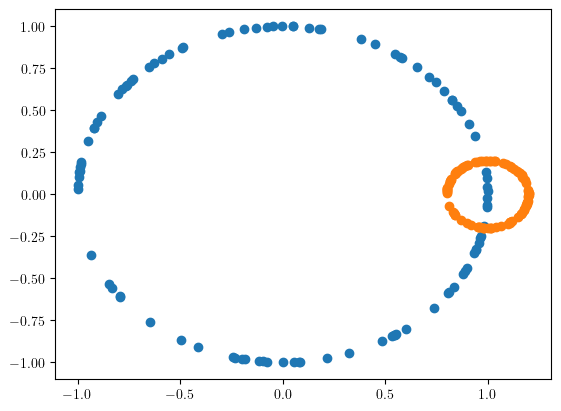

In [ ]:
n = 100
coord = np.random.uniform(low=0, high=2*np.pi, size=n) 
x = [np.cos(co) for co in coord]
y = [np.sin(co) for co in coord] 

x_1 = [1 + np.cos(co)/5 for co in coord]
y_1 = [np.sin(co)/5 for co in coord]

plt.scatter(x,y)
plt.scatter(x_1, y_1)


plt.show()

data = np.random.uniform(-1.0, 1.0, [2*n, 2])
for i in range(n):
    data[i][0] = x[i]
    data[n+i][0] = x_1[i]
    data[i][1] = y[i]
    data[n+i][1] = y_1[i]




In [ ]:
# Get homological information from Ripser

max_barcode = 1 #off/on/SECOND Largest choice of barcode, overides choose and max_nhood if > 0, -1: smallest code
field = 5 # for computing cocycles
cocycles, distance_matrix, ripser_result = initial_ripser_calculation(data, field, plot=0)
if max_barcode != 0:
    choose = 0
    length = 0
    lengths = []
    n_sizes = []
    for i in range(0, len(cocycles[1][:])):
        birth = ripser_result['dgms'][1][i][0]
        death = ripser_result['dgms'][1][i][1]
        life = death - birth
        lengths.append(life)
        n_sizes.append((1 * death + 3 * birth) / 4)
    if max_barcode == 1:
        idx = np.argmax(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == 2:
        n = 2
        idxes = [lengths.index(i) for i in sorted(lengths, reverse=True)][:n]
        idx = idxes[1]
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == -1:
        idx = np.argmin(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
else:
    birth = ripser_result['dgms'][1][choose][0]
    death = ripser_result['dgms'][1][choose][1]
    max_nhood_size = (death + 3 * birth) / 4

selected_cocycle = cocycles[1][choose]


Choose:0


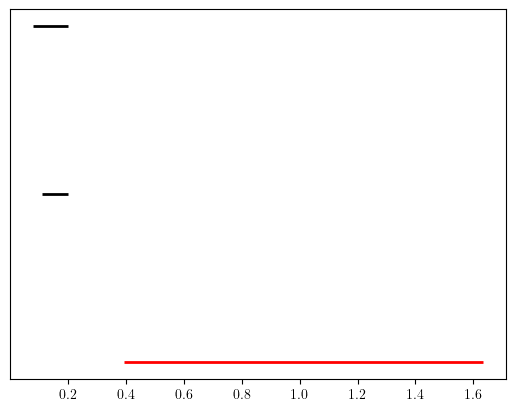

In [ ]:
for i in range(0, len(cocycles[1][:])):
    birth = ripser_result['dgms'][1][i][0]
    death = ripser_result['dgms'][1][i][1]
    if i == choose:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
        print('Choose:'+str(i))
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.yticks([])
plt.show()